In [ ]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [ ]:
from pycaret.utils import version
version()

'3.2.0'

In [ ]:
import pandas as pd

dataset = pd.read_csv("/content/training_dataset.csv")

In [ ]:
pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
werkzeug 3.0.1 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,NIR_1,NIR_2,Class
0,31,92,94,170,339,493,432,209,117,118,0
1,113,376,306,624,1000,1000,1000,711,261,255,0
2,122,406,325,671,1000,1000,1000,750,273,264,0
3,117,388,310,640,1000,1000,1000,771,267,270,0
4,110,366,294,609,1000,1000,1000,734,258,261,0


In [8]:
from pycaret.classification import *
s = setup(data=dataset, target='Class')

# Other Parameters:
# train_size = 0.7
# data_split_shuffle = False

,Description,Value
0,Session id,6018
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(2600, 11)"
4,Transformed data shape,"(2600, 11)"
5,Transformed train set shape,"(1819, 11)"
6,Transformed test set shape,"(781, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [ ]:
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9692,0.9964,0.9692,0.9695,0.9691,0.9567,0.9569,2.0830
et,Extra Trees Classifier,0.9687,0.9966,0.9687,0.9691,0.9685,0.9559,0.9562,0.2420
xgboost,Extreme Gradient Boosting,0.9676,0.9967,0.9676,0.9680,0.9674,0.9543,0.9546,0.2150
rf,Random Forest Classifier,0.9637,0.9959,0.9637,0.9645,0.9636,0.9489,0.9494,0.5400
gbc,Gradient Boosting Classifier,0.9637,0.9944,0.9637,0.9640,0.9635,0.9489,0.9492,1.6920
lr,Logistic Regression,0.9417,0.9857,0.9417,0.9435,0.9412,0.9180,0.9192,1.2180
dt,Decision Tree Classifier,0.9368,0.9547,0.9368,0.9374,0.9366,0.9110,0.9114,0.0360
qda,Quadratic Discriminant Analysis,0.9340,0.9876,0.9340,0.9356,0.9340,0.9071,0.9078,0.0550
knn,K Neighbors Classifier,0.9318,0.9843,0.9318,0.9319,0.9312,0.9040,0.9046,0.0500
lda,Linear Discriminant Analysis,0.7900,0.9469,0.7900,0.7645,0.7622,0.6969,0.7169,0.0290


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

 Model performance using "Normalization"

In [9]:
s = setup(data=dataset, target='Class',
      normalize = True, normalize_method = 'minmax')
cm = compare_models()
regression_results = pull()
print(regression_results)

#normalize_method = {zscore, minmax, maxabs, robust}

,Description,Value
0,Session id,1952
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(2600, 11)"
4,Transformed data shape,"(2600, 11)"
5,Transformed train set shape,"(1819, 11)"
6,Transformed test set shape,"(781, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9670,0.9969,0.9670,0.9680,0.9669,0.9536,0.9541,0.4110
lightgbm,Light Gradient Boosting Machine,0.9632,0.9962,0.9632,0.9638,0.9630,0.9481,0.9486,1.8010
rf,Random Forest Classifier,0.9626,0.9954,0.9626,0.9634,0.9624,0.9474,0.9478,0.3480
xgboost,Extreme Gradient Boosting,0.9604,0.9952,0.9604,0.9612,0.9602,0.9443,0.9447,0.2740
gbc,Gradient Boosting Classifier,0.9522,0.9925,0.9522,0.9530,0.9518,0.9326,0.9332,1.6790
knn,K Neighbors Classifier,0.9450,0.9883,0.9450,0.9455,0.9446,0.9226,0.9231,0.0960
qda,Quadratic Discriminant Analysis,0.9390,0.9882,0.9390,0.9410,0.9389,0.9141,0.9150,0.0350
dt,Decision Tree Classifier,0.9357,0.9539,0.9357,0.9363,0.9354,0.9095,0.9099,0.0590
svm,SVM - Linear Kernel,0.8279,0.0000,0.8279,0.8015,0.8017,0.7522,0.7665,0.0460
lda,Linear Discriminant Analysis,0.7840,0.9526,0.7840,0.7568,0.7556,0.6881,0.7077,0.0380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9670  0.9969  0.9670  0.9680   
lightgbm  Light Gradient Boosting Machine    0.9632  0.9962  0.9632  0.9638   
rf               Random Forest Classifier    0.9626  0.9954  0.9626  0.9634   
xgboost         Extreme Gradient Boosting    0.9604  0.9952  0.9604  0.9612   
gbc          Gradient Boosting Classifier    0.9522  0.9925  0.9522  0.9530   
knn                K Neighbors Classifier    0.9450  0.9883  0.9450  0.9455   
qda       Quadratic Discriminant Analysis    0.9390  0.9882  0.9390  0.9410   
dt               Decision Tree Classifier    0.9357  0.9539  0.9357  0.9363   
svm                   SVM - Linear Kernel    0.8279  0.0000  0.8279  0.8015   
lda          Linear Discriminant Analysis    0.7840  0.9526  0.7840  0.7568   
ridge                    Ridge Classifier    0.7641  0.0000  0.7641  0.7362   
nb                            Naive Bayes    0.7438 

Model performance using "Outlier Removal"

In [10]:
setup(data=dataset, target='Class',
      remove_outliers = True, outliers_threshold = 0.05)
cm = compare_models()

,Description,Value
0,Session id,1918
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(2600, 11)"
4,Transformed data shape,"(2509, 11)"
5,Transformed train set shape,"(1728, 11)"
6,Transformed test set shape,"(781, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9670,0.9967,0.9670,0.9679,0.9669,0.9536,0.9540,0.5580
lightgbm,Light Gradient Boosting Machine,0.9599,0.9957,0.9599,0.9604,0.9598,0.9435,0.9437,2.6230
xgboost,Extreme Gradient Boosting,0.9593,0.9943,0.9593,0.9595,0.9591,0.9427,0.9429,0.6810
rf,Random Forest Classifier,0.9571,0.9946,0.9571,0.9578,0.9570,0.9396,0.9400,0.8150
qda,Quadratic Discriminant Analysis,0.9522,0.9878,0.9522,0.9532,0.9521,0.9327,0.9332,0.3110
gbc,Gradient Boosting Classifier,0.9461,0.9913,0.9461,0.9465,0.9459,0.9241,0.9245,1.9750
knn,K Neighbors Classifier,0.9302,0.9817,0.9302,0.9310,0.9296,0.9017,0.9025,0.3630
dt,Decision Tree Classifier,0.9263,0.9469,0.9263,0.9273,0.9259,0.8963,0.8970,0.3150
lr,Logistic Regression,0.9175,0.9535,0.9175,0.9215,0.9172,0.8847,0.8860,0.7410
ridge,Ridge Classifier,0.8186,0.0000,0.8186,0.7816,0.7889,0.7380,0.7539,0.3450


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Model performance using "Transformation"

In [11]:
setup(data=dataset, target='Class',
      transformation = True, transformation_method = 'yeo-johnson')
cm = compare_models()

,Description,Value
0,Session id,864
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(2600, 11)"
4,Transformed data shape,"(2600, 11)"
5,Transformed train set shape,"(1819, 11)"
6,Transformed test set shape,"(781, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9714,0.9972,0.9714,0.9724,0.9714,0.9597,0.9602,0.2800
xgboost,Extreme Gradient Boosting,0.9665,0.9948,0.9665,0.9671,0.9664,0.9528,0.9530,0.2550
lightgbm,Light Gradient Boosting Machine,0.9643,0.9951,0.9643,0.9651,0.9642,0.9497,0.9500,1.2690
gbc,Gradient Boosting Classifier,0.9571,0.9927,0.9571,0.9578,0.9570,0.9396,0.9400,1.7280
rf,Random Forest Classifier,0.9555,0.9957,0.9555,0.9566,0.9553,0.9373,0.9379,0.5300
qda,Quadratic Discriminant Analysis,0.9533,0.9928,0.9533,0.9551,0.9534,0.9342,0.9349,0.1310
dt,Decision Tree Classifier,0.9417,0.9581,0.9417,0.9422,0.9416,0.9179,0.9182,0.0770
lr,Logistic Regression,0.9159,0.9861,0.9159,0.9174,0.9157,0.8816,0.8824,0.7010
lda,Linear Discriminant Analysis,0.9153,0.9663,0.9153,0.9165,0.9144,0.8808,0.8821,0.0750
knn,K Neighbors Classifier,0.8774,0.9658,0.8774,0.8797,0.8757,0.8275,0.8297,0.0910


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
setup(data=dataset, target='Class',
      remove_outliers = True, outliers_threshold = 0.05,
      transformation = True, transformation_method = 'yeo-johnson')

cm = compare_models()

,Description,Value
0,Session id,1161
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(2600, 11)"
4,Transformed data shape,"(2509, 11)"
5,Transformed train set shape,"(1728, 11)"
6,Transformed test set shape,"(781, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9665,0.9963,0.9665,0.9669,0.9664,0.9528,0.9530,0.3850
xgboost,Extreme Gradient Boosting,0.9577,0.9949,0.9577,0.9580,0.9575,0.9404,0.9406,0.3820
lightgbm,Light Gradient Boosting Machine,0.9577,0.9950,0.9577,0.9581,0.9576,0.9404,0.9407,1.8260
rf,Random Forest Classifier,0.9571,0.9951,0.9571,0.9577,0.9570,0.9396,0.9400,0.4550
qda,Quadratic Discriminant Analysis,0.9511,0.9897,0.9511,0.9531,0.9513,0.9311,0.9318,0.2360
gbc,Gradient Boosting Classifier,0.9472,0.9928,0.9472,0.9476,0.9470,0.9257,0.9259,1.2790
dt,Decision Tree Classifier,0.9329,0.9518,0.9329,0.9334,0.9327,0.9056,0.9060,0.2400
lr,Logistic Regression,0.9258,0.9887,0.9258,0.9267,0.9257,0.8955,0.8960,0.9760
lda,Linear Discriminant Analysis,0.9197,0.9689,0.9197,0.9219,0.9187,0.8871,0.8888,0.4190
knn,K Neighbors Classifier,0.8933,0.9678,0.8933,0.8956,0.8918,0.8499,0.8520,0.2520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

 Model performance using "PCA" and normalisation showed maximum accuracy

In [ ]:
setup(data=dataset, target='Class',
      pca = True, pca_method = 'linear',normalize = True, normalize_method = 'minmax')
cm = compare_models()

,Description,Value
0,Session id,6237
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(2600, 11)"
4,Transformed data shape,"(2600, 11)"
5,Transformed train set shape,"(1819, 11)"
6,Transformed test set shape,"(781, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9780,0.9985,0.9780,0.9783,0.9780,0.9690,0.9692,1.8960
et,Extra Trees Classifier,0.9769,0.9988,0.9769,0.9772,0.9769,0.9675,0.9676,0.3930
gbc,Gradient Boosting Classifier,0.9742,0.9983,0.9742,0.9744,0.9741,0.9636,0.9637,2.5260
xgboost,Extreme Gradient Boosting,0.9714,0.9983,0.9714,0.9716,0.9714,0.9597,0.9598,0.4780
rf,Random Forest Classifier,0.9703,0.9981,0.9703,0.9706,0.9703,0.9582,0.9583,0.7440
qda,Quadratic Discriminant Analysis,0.9417,0.9877,0.9417,0.9437,0.9416,0.9179,0.9189,0.0790
dt,Decision Tree Classifier,0.9412,0.9577,0.9412,0.9421,0.9409,0.9172,0.9178,0.0500
knn,K Neighbors Classifier,0.9324,0.9827,0.9324,0.9329,0.9319,0.9048,0.9054,0.0620
nb,Naive Bayes,0.8950,0.9728,0.8950,0.8958,0.8937,0.8521,0.8535,0.0420
svm,SVM - Linear Kernel,0.8461,0.0000,0.8461,0.8239,0.8250,0.7792,0.7913,0.0570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

#EXTRA TREES

In [13]:
setup(data=dataset, target='Class',
      pca = True, pca_method = 'linear',normalize = True, normalize_method = 'minmax')

etModel = create_model('et')
# Explore more parameters

,Description,Value
0,Session id,7783
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(2600, 11)"
4,Transformed data shape,"(2600, 11)"
5,Transformed train set shape,"(1819, 11)"
6,Transformed test set shape,"(781, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9945,0.9998,0.9945,0.9946,0.9945,0.9923,0.9923
1,0.9835,0.9987,0.9835,0.9840,0.9834,0.9768,0.9771
2,0.9725,0.9986,0.9725,0.9726,0.9725,0.9613,0.9614
3,0.9670,0.9985,0.9670,0.9674,0.9670,0.9536,0.9537
4,0.9890,0.9993,0.9890,0.9894,0.9890,0.9845,0.9847
5,0.9835,0.9996,0.9835,0.9836,0.9835,0.9768,0.9768
6,0.9945,0.9996,0.9945,0.9946,0.9945,0.9923,0.9923
7,0.9670,0.9984,0.9670,0.9684,0.9670,0.9536,0.9542
8,0.9615,0.9970,0.9615,0.9616,0.9615,0.9458,0.9459


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

SVM Model


In [14]:
setup(data=dataset, target='Class',
      pca = True, pca_method = 'linear',normalize = True, normalize_method = 'minmax')

SVMmodel = create_model('svm')
# Explore more parameters

,Description,Value
0,Session id,2407
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(2600, 11)"
4,Transformed data shape,"(2600, 11)"
5,Transformed train set shape,"(1819, 11)"
6,Transformed test set shape,"(781, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.0000,0.7857,0.7543,0.7559,0.6905,0.7096
1,0.8132,0.0000,0.8132,0.7767,0.7838,0.7302,0.7465
2,0.7857,0.0000,0.7857,0.7773,0.7598,0.6905,0.7186
3,0.8132,0.0000,0.8132,0.7713,0.7827,0.7302,0.7444
4,0.8187,0.0000,0.8187,0.7790,0.7886,0.7381,0.7534
5,0.8407,0.0000,0.8407,0.7962,0.8092,0.7698,0.7836
6,0.8516,0.0000,0.8516,0.7947,0.8189,0.7857,0.7941
7,0.7912,0.0000,0.7912,0.7389,0.7612,0.6984,0.7055
8,0.8462,0.0000,0.8462,0.8061,0.8166,0.7778,0.7929


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Naive Bayes


In [15]:
setup(data=dataset, target='Class',
      pca = True, pca_method = 'linear',normalize = True, normalize_method = 'minmax')

nbModel = create_model('nb')


,Description,Value
0,Session id,8742
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(2600, 11)"
4,Transformed data shape,"(2600, 11)"
5,Transformed train set shape,"(1819, 11)"
6,Transformed test set shape,"(781, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9121,0.9823,0.9121,0.9193,0.9114,0.8762,0.8799
1,0.9121,0.9737,0.9121,0.9112,0.9115,0.8762,0.8763
2,0.9121,0.9865,0.9121,0.9129,0.9109,0.8762,0.8776
3,0.8791,0.9729,0.8791,0.8799,0.8773,0.8298,0.8316
4,0.9341,0.9867,0.9341,0.9352,0.9337,0.9071,0.9079
5,0.9121,0.9887,0.9121,0.9144,0.9097,0.8762,0.8790
6,0.8791,0.9563,0.8791,0.8788,0.8761,0.8298,0.8320
7,0.8901,0.9725,0.8901,0.8913,0.8889,0.8452,0.8466
8,0.8791,0.9674,0.8791,0.8812,0.8774,0.8298,0.8319


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#Decision Tree


In [16]:
setup(data=dataset, target='Class',
      pca = True, pca_method = 'linear',normalize = True, normalize_method = 'minmax')

dtModel = create_model('dt')

,Description,Value
0,Session id,4528
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(2600, 11)"
4,Transformed data shape,"(2600, 11)"
5,Transformed train set shape,"(1819, 11)"
6,Transformed test set shape,"(781, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9176,0.9415,0.9176,0.9194,0.9181,0.8841,0.8845
1,0.9121,0.9365,0.9121,0.9126,0.9122,0.8762,0.8763
2,0.9780,0.9841,0.9780,0.9781,0.9779,0.9690,0.9692
3,0.9341,0.9524,0.9341,0.9401,0.9348,0.9071,0.9092
4,0.9341,0.9524,0.9341,0.9349,0.9343,0.9071,0.9073
5,0.9505,0.9643,0.9505,0.9519,0.9506,0.9302,0.9307
6,0.9286,0.9484,0.9286,0.9293,0.9285,0.8994,0.8997
7,0.9286,0.9484,0.9286,0.9293,0.9288,0.8994,0.8995
8,0.9341,0.9524,0.9341,0.9353,0.9340,0.9071,0.9078


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#stack 3 models

In [18]:
# Ensemble models
ensemble_model = stack_models(estimator_list=[dtModel, nbModel,SVMmodel])

# Evaluate ensemble model
evaluate_model(ensemble_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9451,0.9902,0.9451,0.9453,0.9452,0.9226,0.9227
1,0.9341,0.9827,0.9341,0.9346,0.9341,0.9071,0.9073
2,0.9725,0.9940,0.9725,0.9727,0.9725,0.9613,0.9614
3,0.9451,0.9964,0.9451,0.9510,0.9458,0.9226,0.9247
4,0.9615,0.9949,0.9615,0.9616,0.9615,0.9458,0.9459
5,0.9670,0.9990,0.9670,0.9678,0.9672,0.9536,0.9537
6,0.9615,0.9909,0.9615,0.9616,0.9614,0.9458,0.9460
7,0.9615,0.9947,0.9615,0.9625,0.9617,0.9458,0.9461
8,0.9560,0.9907,0.9560,0.9564,0.9560,0.9381,0.9383


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Blend Models

Stacked Models

In [20]:
sm = save_model(ensemble_model, 'Ensemble_Model_Final')

Transformation Pipeline and Model Successfully Saved


In [21]:
newdataset = pd.read_csv("/content/testing_dataset.csv")

In [22]:
newPredictions = predict_model(ensemble_model, data = newdataset)
newPredictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9738,0.9973,0.9738,0.9742,0.9737,0.9631,0.9634


,F1,F2,F3,F4,F5,F6,F7,F8,NIR_1,NIR_2,Class,prediction_label,prediction_score
0,28,85,82,159,297,424,364,172,101,99,0,0,0.9051
1,65,213,172,370,750,1000,891,417,170,175,0,0,0.9023
2,88,296,234,514,952,1000,1000,525,216,209,0,0,0.7656
3,42,138,121,250,578,812,686,320,139,140,0,0,0.8843
4,41,133,114,236,480,679,574,268,136,138,0,0,0.7750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,5,16,18,27,44,56,51,29,14,12,3,3,0.9864
646,5,16,18,27,45,57,52,29,12,12,3,3,0.9869
647,5,16,18,27,45,57,53,30,14,12,3,3,0.9863
648,5,16,18,27,46,56,52,29,14,12,3,3,0.9861


In [ ]:
newPredictions.to_csv("NewPredictions.csv", index=False)

from google.colab import files
files.download('NewPredictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
# Load the PyCaret trained ensemble model
ensemble_model = load_model('Ensemble_Model_Final')  # Replace 'your_ensemble_model_name' with the actual name

# Make predictions on the testing dataset
newPredictions = predict_model(ensemble_model, data=newdataset)

# Evaluate the model on the testing dataset
accuracy = accuracy_score(newPredictions['Class'], newPredictions['Class'])  # Replace 'target_column' with the actual target column name

# Print the accuracy
print(f"Accuracy on the testing dataset: {accuracy}")

# Save predictions to a CSV file
newPredictions.to_csv("NewPredictions.csv", index=False)

# Download the CSV file
from google.colab import files
files.download('NewPredictions.csv')


Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9738,0.9973,0.9738,0.9742,0.9737,0.9631,0.9634


Accuracy on the testing dataset: 1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Plots

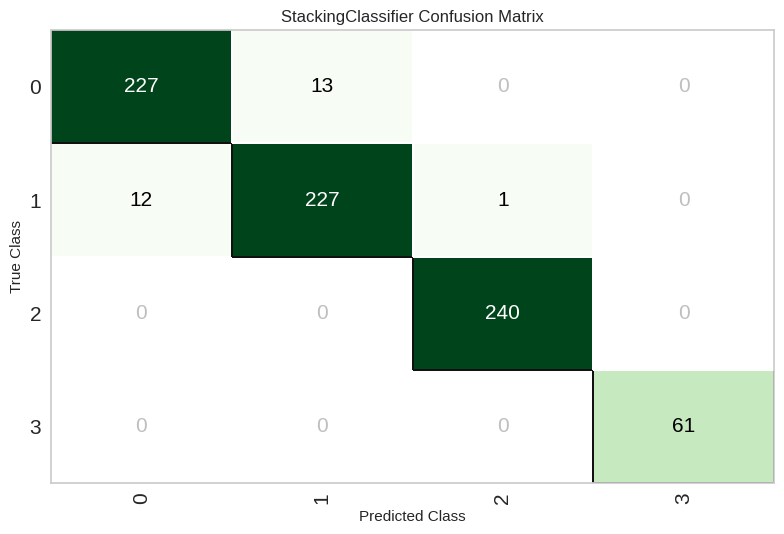

In [29]:
plot_model(ensemble_model, plot='confusion_matrix')

Plot the "learning curve"

KeyboardInterrupt: ignored

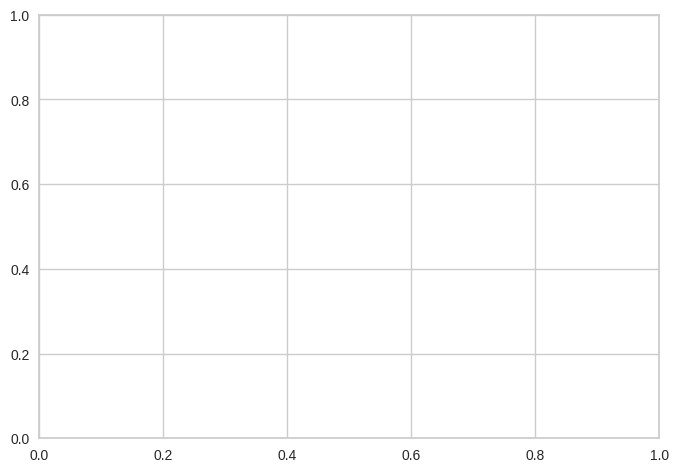

In [30]:
plot_model(ensemble_model, plot='learning')

Plot the "AUC Curve" (Area Under the Curve)

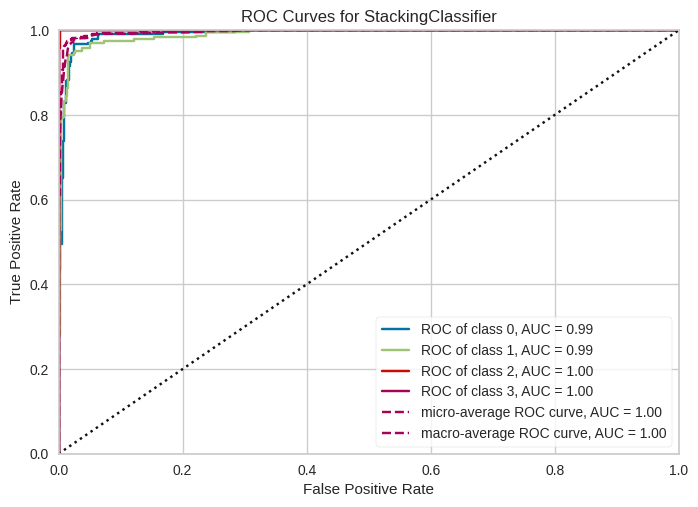

In [31]:
plot_model(ensemble_model, plot='auc')

Plot the "Decision Boundary"

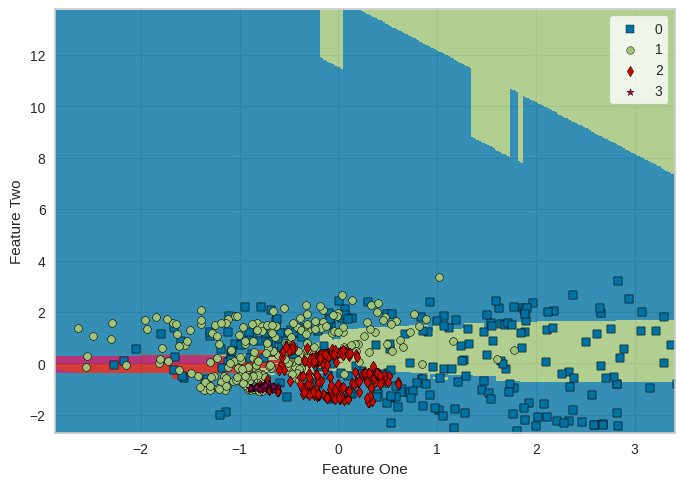

In [32]:
plot_model(ensemble_model, plot='boundary')